In [2]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [3]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [4]:
analysis = scripts.Analysis()

In [5]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03b_wn_620_720',
                          'ng_6',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_6',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all.9',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_a3d1611',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [6]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03b_wn_620_720',
                          'ng_6',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_6',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all.9',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_a3d1611',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [7]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [8]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [9]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [10]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [11]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 620

nband = 100

nv = 200

dv = 0.005

tsfc = 294.0

ng = 6

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 6 /)

data wgt
     &     /6 * .9/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 0

klin = 6.375563e-24

include 'mls75.pro'


In [12]:
fig.display_hrefanchor()

In [13]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [14]:
table_dgdgs.display_hrefanchor()

In [15]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [16]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [17]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

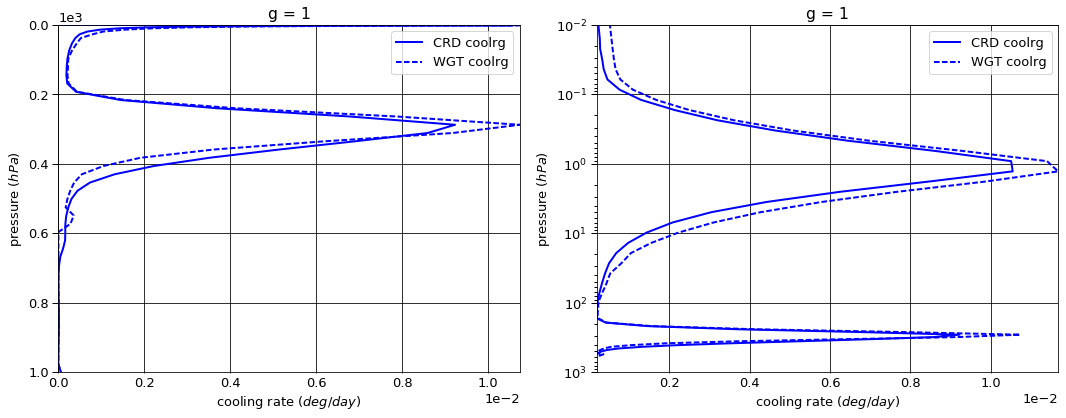

# Figure: cooling rate g-group 2

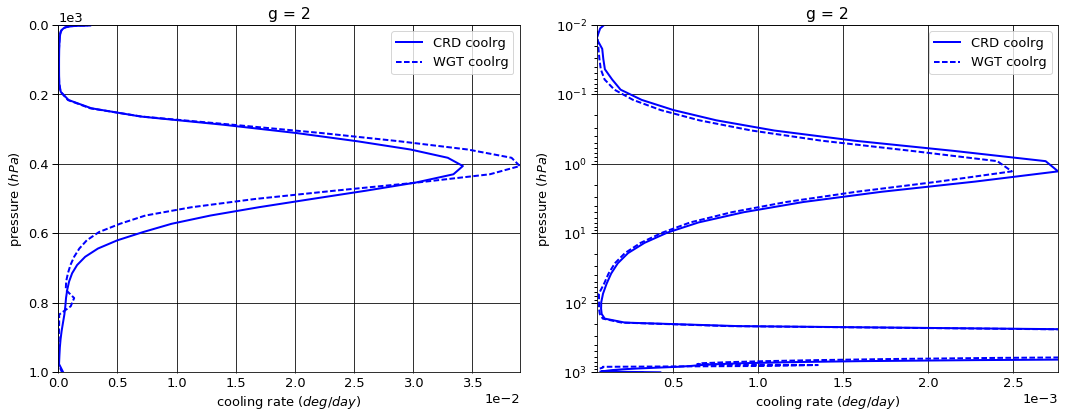

# Figure: cooling rate g-group 3

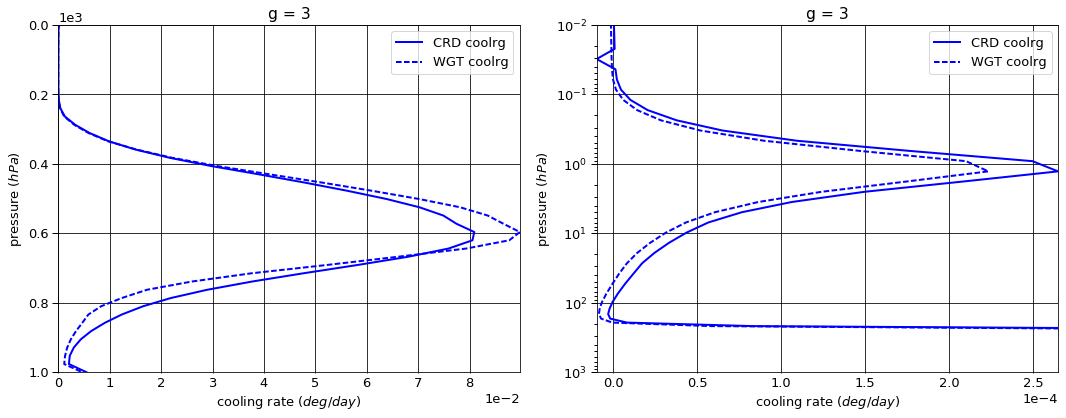

# Figure: cooling rate g-group 4

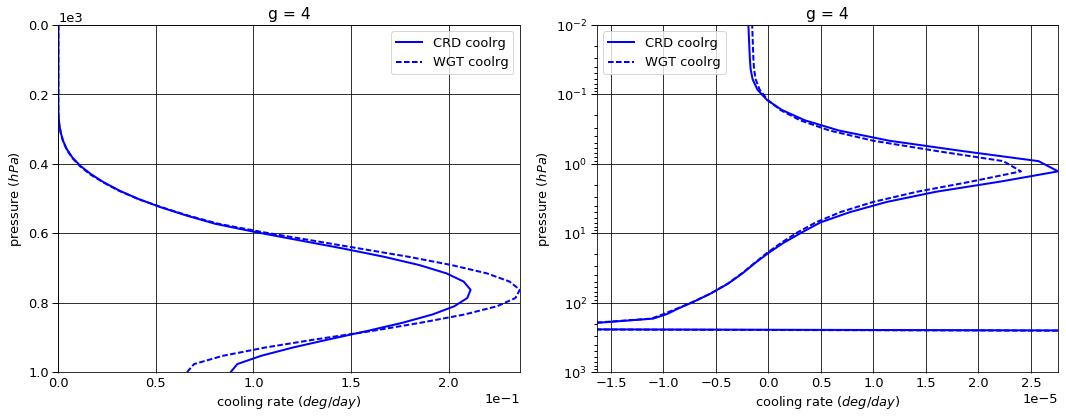

# Figure: cooling rate g-group 5

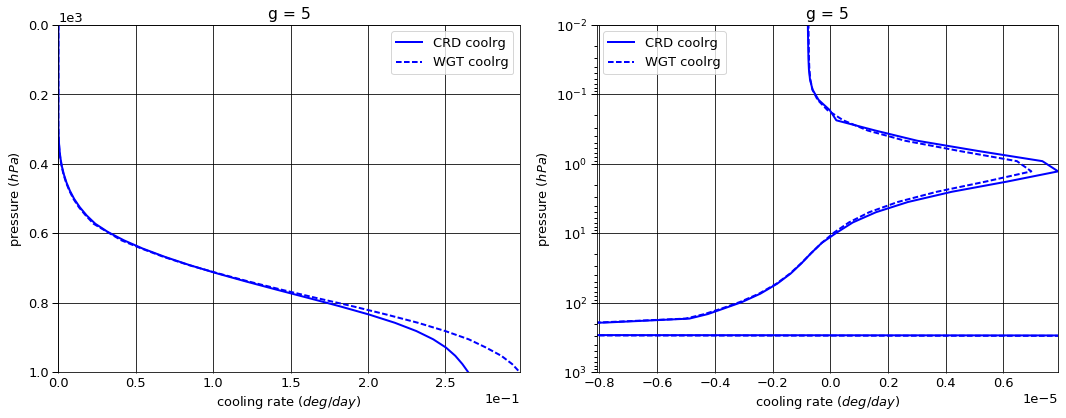

# Figure: cooling rate g-group 6

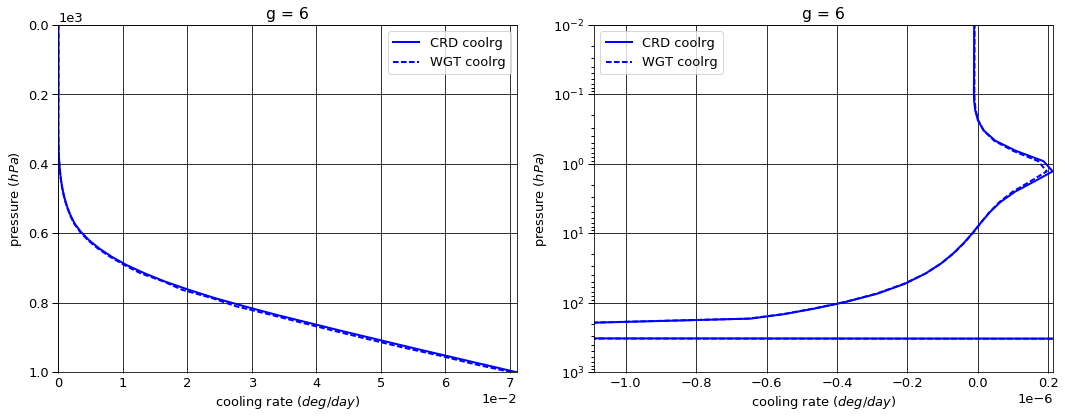

# Figure: cooling rate g-group total

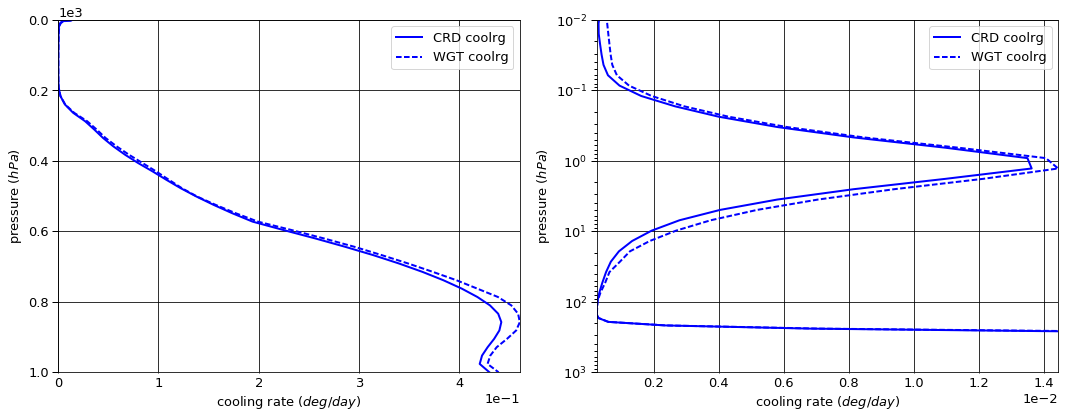

In [18]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [19]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0.0      1      -0.157518   0.000000  -0.157518
  1013.0   76     -0.349038   0.348862  -0.000176
2 0.0      1      -0.971462   0.000000  -0.971462
  1013.0   76     -1.753703   1.752588  -0.001115
3 0.0      1      -3.052607   0.000000  -3.052607
  1013.0   76     -4.372426   4.356145  -0.016282
4 0.0      1      -9.621143   0.000000  -9.621143
  1013.0   76    -11.484382  10.764337  -0.720045
5 0.0      1     -16.547134   0.000000 -16.547134
  1013.0   76    -17.550515   9.453115  -8.097400
6 0.0      1      -8.303151   0.000000  -8.303151
  1013.0   76     -8.454773   1.735722  -6.719051


WGT


flug       fldg      fnetg
g pressure level                                 
1 0.0      1      -0.152633   0.000000  -0.152633
  1013.0   76     -0.349038   0.348862  -0.000176
2 0.0      1      -0.945756   0.000000  -0.945756
  1013.0   76     -1.753703   1.752803  -0.000900
3 0.0      1      -3.002904   0.000000  -3.002904
  1013.0   76     -4.372426   4.359979  -0.012447
4 0.0      1      -9.525451   0.000000  -9.525451
  1013.0   76    -11.484382  11.159714  -0.324668
5 0.0      1     -16.519759   0.000000 -16.519759
  1013.0   76    -17.550515  10.043437  -7.507078
6 0.0      1      -8.306673   0.000000  -8.306673
  1013.0   76     -8.454773   1.694371  -6.760402


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.004884  0.000000  0.004884
  1013.0   76     0.000000  0.000000  0.000000
2 0.0      1      0.025707  0.000000  0.025707
  1013.0   76     0.000000  0.000215  0.000215
3 0.0      1      0.049703  0.000000  0.049703
  1013.0   76     0.000000  0.003834  0.003834
4 0.0      1      0.095692  0.000000  0.095692
  1013.0   76     0.000000  0.395377  0.395377
5 0.0      1      0.027375  0.000000  0.027375
  1013.0   76     0.000000  0.590321  0.590322
6 0.0      1     -0.003522  0.000000 -0.003522
  1013.0   76     0.000000 -0.041351 -0.041351

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1      5.442658e-05
  1001.112500 75     6.347439e-05
2 0.000312    1      2.455056e-05
  1001.112500 75     4.231812e-04
3 0.000312    1     -7.199968e-07
  1001.112500 75     5.503967e-03
4 0.000312    1     -2.193553e-06
  1001.112500 75     8.823921e-02
5 0.000312    1     -8.070439e-07
  1001.112500 75     2.647386e-01
6 0.000312    1     -9.198244e-09
  1001.112500 75     7.112422e-02


WGT


coolrg
g pressure    layer              
1 0.000312    1      3.221869e-04
  1001.112500 75     6.347439e-05
2 0.000312    1      1.078588e-05
  1001.112500 75     3.245467e-04
3 0.000312    1     -2.148793e-06
  1001.112500 75     4.683488e-03
4 0.000312    1     -1.774781e-06
  1001.112500 75     6.586009e-02
5 0.000312    1     -7.785605e-07
  1001.112500 75     2.980225e-01
6 0.000312    1     -8.045462e-09
  1001.112500 75     7.029662e-02


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      2.677603e-04
  1001.112500 75     0.000000e+00
2 0.000312    1     -1.376468e-05
  1001.112500 75    -9.863450e-05
3 0.000312    1     -1.428796e-06
  1001.112500 75    -8.204790e-04
4 0.000312    1      4.187723e-07
  1001.112500 75    -2.237912e-02
5 0.000312    1      2.848334e-08
  1001.112500 75     3.328393e-02
6 0.000312    1      1.152783e-09
  1001.112500 75    -8.275980e-04

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-38.653015,0.000000,-38.653015
1013.0,76,-43.964837,28.410769,-15.554069



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-38.453176,0.000000,-38.453176
1013.0,76,-43.964837,29.359165,-14.605672



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.199839,0.000000,0.199839
1013.0,76,0.000000,0.948396,0.948397


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.000075
1001.112500,75,0.430093



WGT


,,coolrg
pressure,layer,
0.000312,1,0.000328
1001.112500,75,0.439251



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.000253
1001.112500,75,0.009158


In [20]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.00785,0.008061
2,0.03975,0.040075
3,0.09910,0.099951
4,0.26045,0.262272
5,0.39860,0.399847
6,0.19425,0.189795


In [21]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,1.570565e-21
2,2.399409e-22
3,3.665664e-23
4,5.600168e-24
5,8.555579e-25
6,1.307067e-25


In [24]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [6]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [25]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,1.570565e-21,NaN,0.00785,0.008061,0.00785,0.008061,600.0
2,2.399409e-22,0.152774,0.03975,0.040075,0.04760,0.048136,600.0
3,3.665664e-23,0.152774,0.09910,0.099951,0.14670,0.148087,600.0
4,5.600168e-24,0.152774,0.26045,0.262272,0.40715,0.410358,600.0
5,8.555579e-25,0.152774,0.39860,0.399847,0.80575,0.810205,600.0
6,1.307067e-25,0.152774,0.19425,0.189795,1.00000,1.000000,600.0


In [26]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [27]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                    
1     1     0.000312  3.841780e-21  9.311667e-23  41.257702
      2     0.000312  1.659686e-22  3.286370e-24  50.502108
      3     0.000312  1.952240e-24  1.449278e-25  13.470427
      4     0.000312  2.831199e-25  2.358085e-26  12.006348
      5     0.000312  5.562530e-26  3.683926e-27  15.099461
      6     0.000312  9.702478e-28  3.443918e-28   2.817279
2     1     0.000750  3.866215e-21  9.325404e-23  41.458961
      2     0.000750  1.669611e-22  3.292696e-24  50.706499
      3     0.000750  1.973634e-24  1.453885e-25  13.574897
      4     0.000750  2.843630e-25  2.366111e-26  12.018163
      5     0.000750  5.597423e-26  3.698384e-27  15.134780
      6     0.000750  9.803123e-28  3.472554e-28   2.823029
3     1     0.001052  3.918595e-21  9.350760e-23  41.906707
      2     0.001052  1.690906e-22  3.304113e-24  51.175806
      3     0.001052  2.019392e-24  1.461898e-25  13.813493
      4     0.001052  2.870230e-25  2.381985e-26  12.049739
      5     0.001052  5.672192e-26  3.727065e-27  15.218922
      6     0.001052  1.001651e-27  3.530454e-28   2.837173
4     1     0.001476  3.974666e-21  9.378424e-23  42.380963
      2     0.001476  1.713718e-22  3.316771e-24  51.668279
      3     0.001476  2.069135e-24  1.470754e-25  14.068533
      4     0.001476  2.898860e-25  2.399089e-26  12.083171
      5     0.001476  5.752463e-26  3.757758e-27  15.308229
      6     0.001476  1.024866e-27  3.593137e-28   2.852287
5     1     0.002070  4.031422e-21  9.407387e-23  42.853790
      2     0.002070  1.736826e-22  3.330287e-24  52.152437
      3     0.002070  2.120343e-24  1.480195e-25  14.324751
      4     0.002070  2.928021e-25  2.416657e-26  12.115999
      5     0.002070  5.833981e-26  3.789045e-27  15.396969
      6     0.002070  1.048805e-27  3.657685e-28   2.867402
6     1     0.002904  4.088805e-21  9.438107e-23  43.322296
      2     0.002904  1.760206e-22  3.344942e-24  52.622908
      3     0.002904  2.173055e-24  1.490430e-25  14.580051
      4     0.002904  2.957710e-25  2.434833e-26  12.147485
      5     0.002904  5.916700e-26  3.821155e-27  15.484059
      6     0.002904  1.073514e-27  3.724471e-28   2.882327
7     1     0.004074  4.146805e-21  9.471266e-23  43.783003
      2     0.004074  1.783854e-22  3.361146e-24  53.072794
      3     0.004074  2.227381e-24  1.501762e-25  14.831782
      4     0.004074  2.987954e-25  2.453841e-26  12.176641
      5     0.004074  6.000645e-26  3.854452e-27  15.568089
      6     0.004074  1.099082e-27  3.794110e-28   2.896810
8     1     0.005714  4.205405e-21  9.507829e-23  44.230971
      2     0.005714  1.807764e-22  3.379478e-24  53.492397
      3     0.005714  2.283457e-24  1.514613e-25  15.076170
      4     0.005714  3.018788e-25  2.473995e-26  12.202080
      5     0.005714  6.085851e-26  3.889450e-27  15.647074
      6     0.005714  1.125626e-27  3.867478e-28   2.910492
9     1     0.008015  4.264590e-21  9.549164e-23  44.659303
      2     0.008015  1.831927e-22  3.400757e-24  53.868226
      3     0.008015  2.341473e-24  1.529578e-25  15.307965
      4     0.008015  3.050263e-25  2.495741e-26  12.221871
      5     0.008015  6.172369e-26  3.926880e-27  15.718253
      6     0.008015  1.153315e-27  3.945830e-28   2.922870
10    1     0.011243  4.324310e-21  9.597196e-23  45.058055
      2     0.011243  1.856323e-22  3.426135e-24  54.181252
      3     0.011243  2.401661e-24  1.547484e-25  15.519779
      4     0.011243  3.082434e-25  2.519705e-26  12.233312
      5     0.011243  6.260231e-26  3.967764e-27  15.777728
      6     0.011243  1.182366e-27  4.030928e-28   2.933235
11    1     0.015771  4.384495e-21  9.654645e-23  45.413319
      2     0.015771  1.880919e-22  3.457237e-24  54.405259
      3     0.015771  2.464332e-24  1.569481e-25  15.701576
      4     0.015771  3.115376e-25  2.546768e-26  12.232667
      5     0.015771  6.349474e-26  4.013548e-27  15

# Histogram of wavenumbers in g-group 1

In [28]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [29]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
